# Data Exploration
per serving / per recipe

plot the distributions of calories and other nutrients, see statistics by group / by source

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import random 
import re
import ast
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'
pd.options.display.float_format = "{:.1f}".format
#pd.set_option('max_colwidth', 200)

In [4]:
# top 50 ingredients in training set

list1 = pd.read_csv('./data/per_serving/top_100_ingre_per_serving.csv')
list1[:50]

,ingredient,recipe number
0,olive oil,2524
1,egg,1652
2,kosher salt,1295
3,garlic clove,1276
4,butter,1040
5,sugar,1008
6,black pepper,925
7,caster sugar,881
8,onion,862
9,vanilla extract,753


## snippet of collected dataset

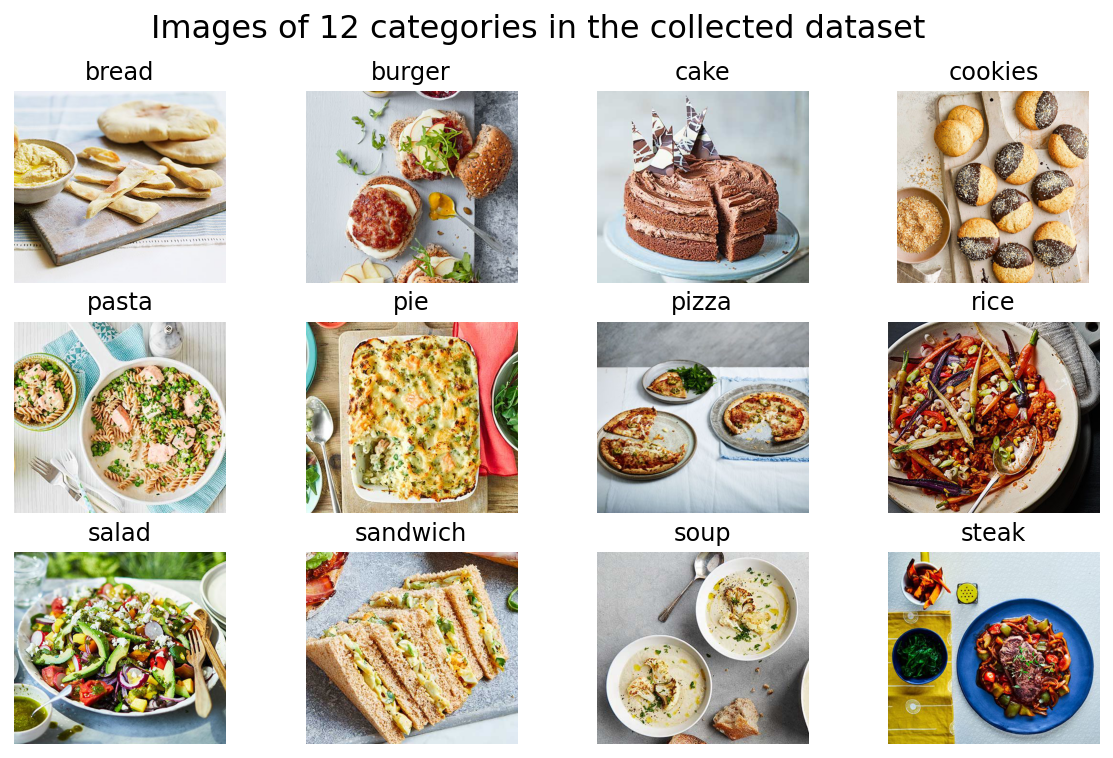

In [43]:
all_data = pd.read_csv('./data/all_data_clean.csv')
categories = ['bread', 'burger', 'cake', 'cookies', 'pasta', 'pie', 'pizza','rice', 'salad', 'sandwich', 'soup', 'steak']

index = 4
plt.figure(figsize=(10,6))
plt.suptitle('Images of 12 categories in the collected dataset', fontsize=16, y=0.97)

for i, category in enumerate(categories):
    path = './data/all_data/' + list(all_data[all_data['category']==category][index:index+1]['file_name'])[0]
    image = Image.open(path)
    plt.subplot(3,4,i+1)
    plt.title(category)
    plt.imshow(image)
    plt.axis('off')

## Per serving

In [14]:
train = pd.read_csv('./data/per_serving/train_per_serving_complete.csv')
train['nutrient_vector'] = train['nutrient_vector'].apply(ast.literal_eval)
print(len(train))

6457


In [21]:
train[train['category']=='cake'][train['source']=='kitchen'][-20:]

<ipython-input-21-7584b227ad30>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['category']=='cake'][train['source']=='kitchen'][-20:]


,title,image,ingredients,nutrients,file_name,category,serving,url,source,calorie,category_vector,parsed_ingredients,ingredient_vector,nutrient_vector
4834,Baked Brie with Cranberry Sauce,https://cdn.apartmenttherapy.info/image/fetch/...,"['8-ounce round brie cheese, at room temperatu...","{'Calories ': '208', 'Fat ': '14.1 g (21.6%)',...",kitchen_cake765.jpg,cake,4.0,NaN,kitchen,208,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['round cheese', 'cranberry sauce', 'brown sug...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[14.1, 12.1, 8.8]"
4835,How To Make Butter (and Cultured Butter!),https://cdn.apartmenttherapy.info/image/fetch/...,"['1 pint (2 cups) heavy cream, preferably orga...","{'Calories ': '206', 'Fat ': '22.1 g (33.9%)',...",kitchen_cake766.jpg,cake,1.0,NaN,kitchen,206,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['heavy cream', 'yogurt optional', 'salt optio...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[22.1, 1.7, 1.2]"
4836,How to Make Beet Kvass,https://cdn.apartmenttherapy.info/image/fetch/...,"['12 ounces beets (approximately)', '1 to 2 te...","{'Calories ': '76', 'Fat ': '0.3 g (0.5%)', 'S...",kitchen_cake767.jpg,cake,1.0,NaN,kitchen,76,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['beet', 'recipe note', 'flavoring ginger']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.3, 16.9, 2.8]"
4837,How to Make Italian-Style Grissini,https://cdn.apartmenttherapy.info/image/fetch/...,"['1/2 cup whole wheat flour', '3/4 cup warm wa...","{'Calories ': '323', 'Fat ': '30.1 g (46.2%)',...",kitchen_cake769.jpg,cake,2.0,NaN,kitchen,323,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['wheat flour', 'warm water', 'honey', 'active...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[30.1, 12.3, 2.0]"
4838,"How To Make Classic, Creamy Chicken Salad",https://cdn.apartmenttherapy.info/image/fetch/...,"['1 1/2 pounds boneless, skinless chicken brea...","{'Calories ': '290', 'Fat ': '18.5 g (28.5%)',...",kitchen_cake770.jpg,cake,6.0,NaN,kitchen,290,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['boneles', 'red onion', 'salt', 'scallion', '...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...","[18.5, 2.8, 26.7]"
4839,Chocolate-Glazed Baked Doughnuts with Sprinkles,https://cdn.apartmenttherapy.info/image/fetch/...,"['2 teaspoons active dry yeast', '2 tablespoon...","{'Calories ': '321', 'Fat ': '11.2 g (17.2%)',...",kitchen_cake771.jpg,cake,12.0,NaN,kitchen,321,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['dry yeast', 'warm water', 'allpurpose flour'...","[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, ...","[11.2, 52.9, 4.0]"
4840,Baked Halibut with Chimichurri,https://cdn.apartmenttherapy.info/image/fetch/...,"['3 cloves garlic', '1 small shallot', '1 cup ...","{'Calories ': '294', 'Fat ': '16.0 g (24.6%)',...",kitchen_cake772.jpg,cake,4.0,NaN,kitchen,294,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['clove garlic', 'shallot', 'parsley', 'cilant...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...","[16.0, 3.7, 32.5]"
4841,How To Make Coffee Concentrate to Serve Coffee...,https://cdn.apartmenttherapy.info/image/fetch/...,"['12 ounces coarsely ground coffee beans', '6 ...","{'Calories ': '300', 'Fat ': '0.4 g (0.7%)', '...",kitchen_cake773.jpg,cake,1.0,NaN,kitchen,300,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['coffee bean', 'water']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.4, 64.1, 10.4]"
4842,How To Make Irish Soda Bread,https://cdn.apartmenttherapy.info/image/fetch/...,"['Oil, for coating the skillet or baking sheet...","{'Calories ': '301', 'Fat ': '7.5 g (11.5%)', ...",kitchen_cake774.jpg,cake,1.0,NaN,kitchen,301,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['oil', 'unsalted butter', 'allpurpose flour',...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...","[7.5, 51.8, 7.5]"
4843,How to Make a Classic Tarte Tatin,https://cdn.apartmenttherapy.info/image/fetch/...,"['6 Granny Smith apples, or other hard, tart a...","{'Calories ': '281', 'Fat ': '10.2 g (15.7%)',...",kitchen_cake775.jpg,cake,8.0,NaN,kitchen,281,"[0, 0, 1

### calorie distributions
by source and by category

,serving,calorie
count,6418.000000,6457.000000
mean,7.108133,365.566052
std,16.680588,143.375213
min,0.000000,73.000000
25%,4.000000,256.000000
50%,4.000000,354.000000
75%,8.000000,479.000000
max,700.000000,650.000000


<Figure size 720x360 with 0 Axes>

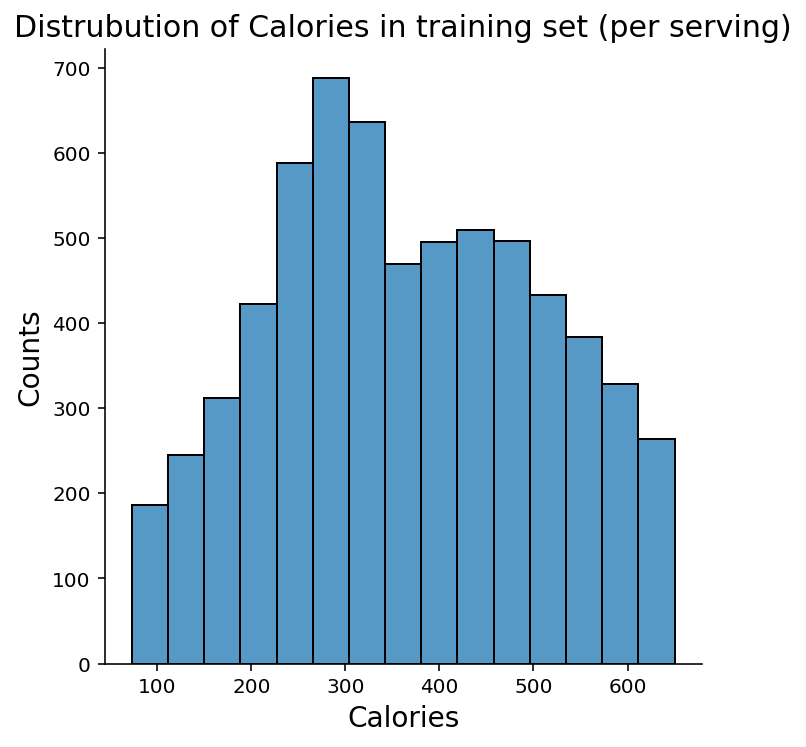

In [12]:
# distribution of calories in training set
# most of calorie values are in the range of (100, 600) (92.5%)
# more than half of all the values fall in the range of (200, 500) (66.1%) 

plt.figure(figsize=(10,5))
sns.displot(train['calorie'], bins = 15)
#plt.bar(appliances, height=10)

plt.xlabel('Calories', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Distrubution of Calories in training set (per serving)', fontsize = 15)
#plt.grid()

train.describe()

In [4]:
def print_percentage_of_extreme_values(train, high, low):
    high_vals = train['calorie'][train['calorie']>high].count()
    low_vals = train['calorie'][train['calorie']<low].count()
    print("Training sample with calorie higher than " + str(high) + "cal: ", high_vals)
    print("Training sample with calorie lower than " + str(low) + "cal: ", low_vals)
    print("The percentage of samples with high and low calories is ", round((high_vals+low_vals)/len(train), 3) * 100, "%")
    
    
print_percentage_of_extreme_values(train, 500, 200)

Training sample with calorie higher than 500cal:  1346
Training sample with calorie lower than 200cal:  845
The percentage of samples with high and low calories is  33.900000000000006 %


,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
bbc,3988.00,383.26,146.43,73.00,270.00,393.00,500.25,650.00
kitchen,2469.00,336.99,133.46,73.00,245.00,310.00,432.00,650.00


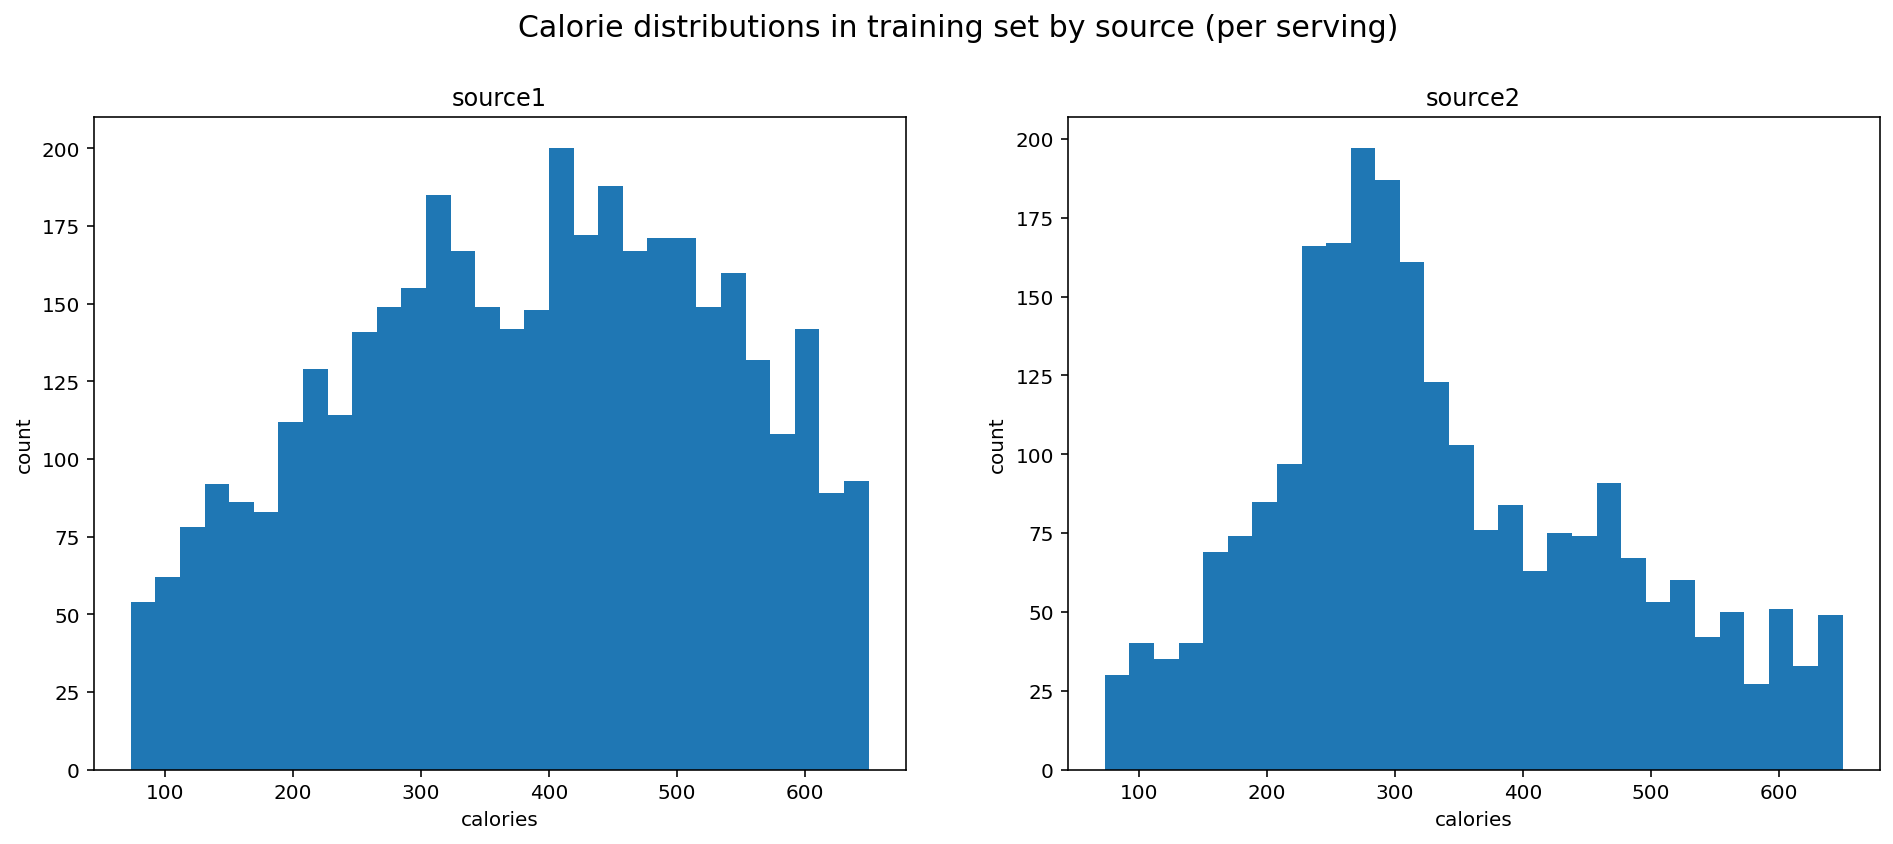

In [6]:
# plot the distributions of calories by source
# samples from bbc somehow have higher calorie values (50cal higher in mean) and higher std
# while samples from kitchen are distributed around 300cal
# this may imply that the annotated calorie values may be not very reliable

plt.figure(figsize=(16,6))
plt.suptitle("Calorie distributions in training set by source (per serving)", fontsize=15, y=1)
plt.subplot(1,2,1)
plt.hist(train[train['source']=='bbc']['calorie'], bins=30)
plt.title('source1')
plt.ylabel('count')
plt.xlabel('calories')
plt.subplot(1,2,2)
plt.title('source2')
plt.ylabel('count')
plt.xlabel('calories')
plt.hist(train[train['source']=='kitchen']['calorie'], bins=30)

train.groupby('source')['calorie'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
bread,507.0,331.7,138.2,74.0,230.5,309.0,431.5,649.0
burger,297.0,367.5,156.8,73.0,247.0,371.0,495.0,649.0
cake,1227.0,373.9,140.1,73.0,269.0,357.0,489.0,650.0
cookies,324.0,292.5,114.0,81.0,232.5,282.0,321.2,644.0
pasta,520.0,447.3,129.8,76.0,371.8,462.5,547.0,649.0
pie,482.0,406.3,135.3,80.0,296.2,409.5,523.0,649.0
pizza,175.0,391.7,141.1,89.0,274.0,413.0,499.0,644.0
rice,726.0,379.3,137.5,73.0,272.2,381.0,487.8,649.0
salad,1177.0,347.2,143.0,73.0,236.0,336.0,460.0,650.0


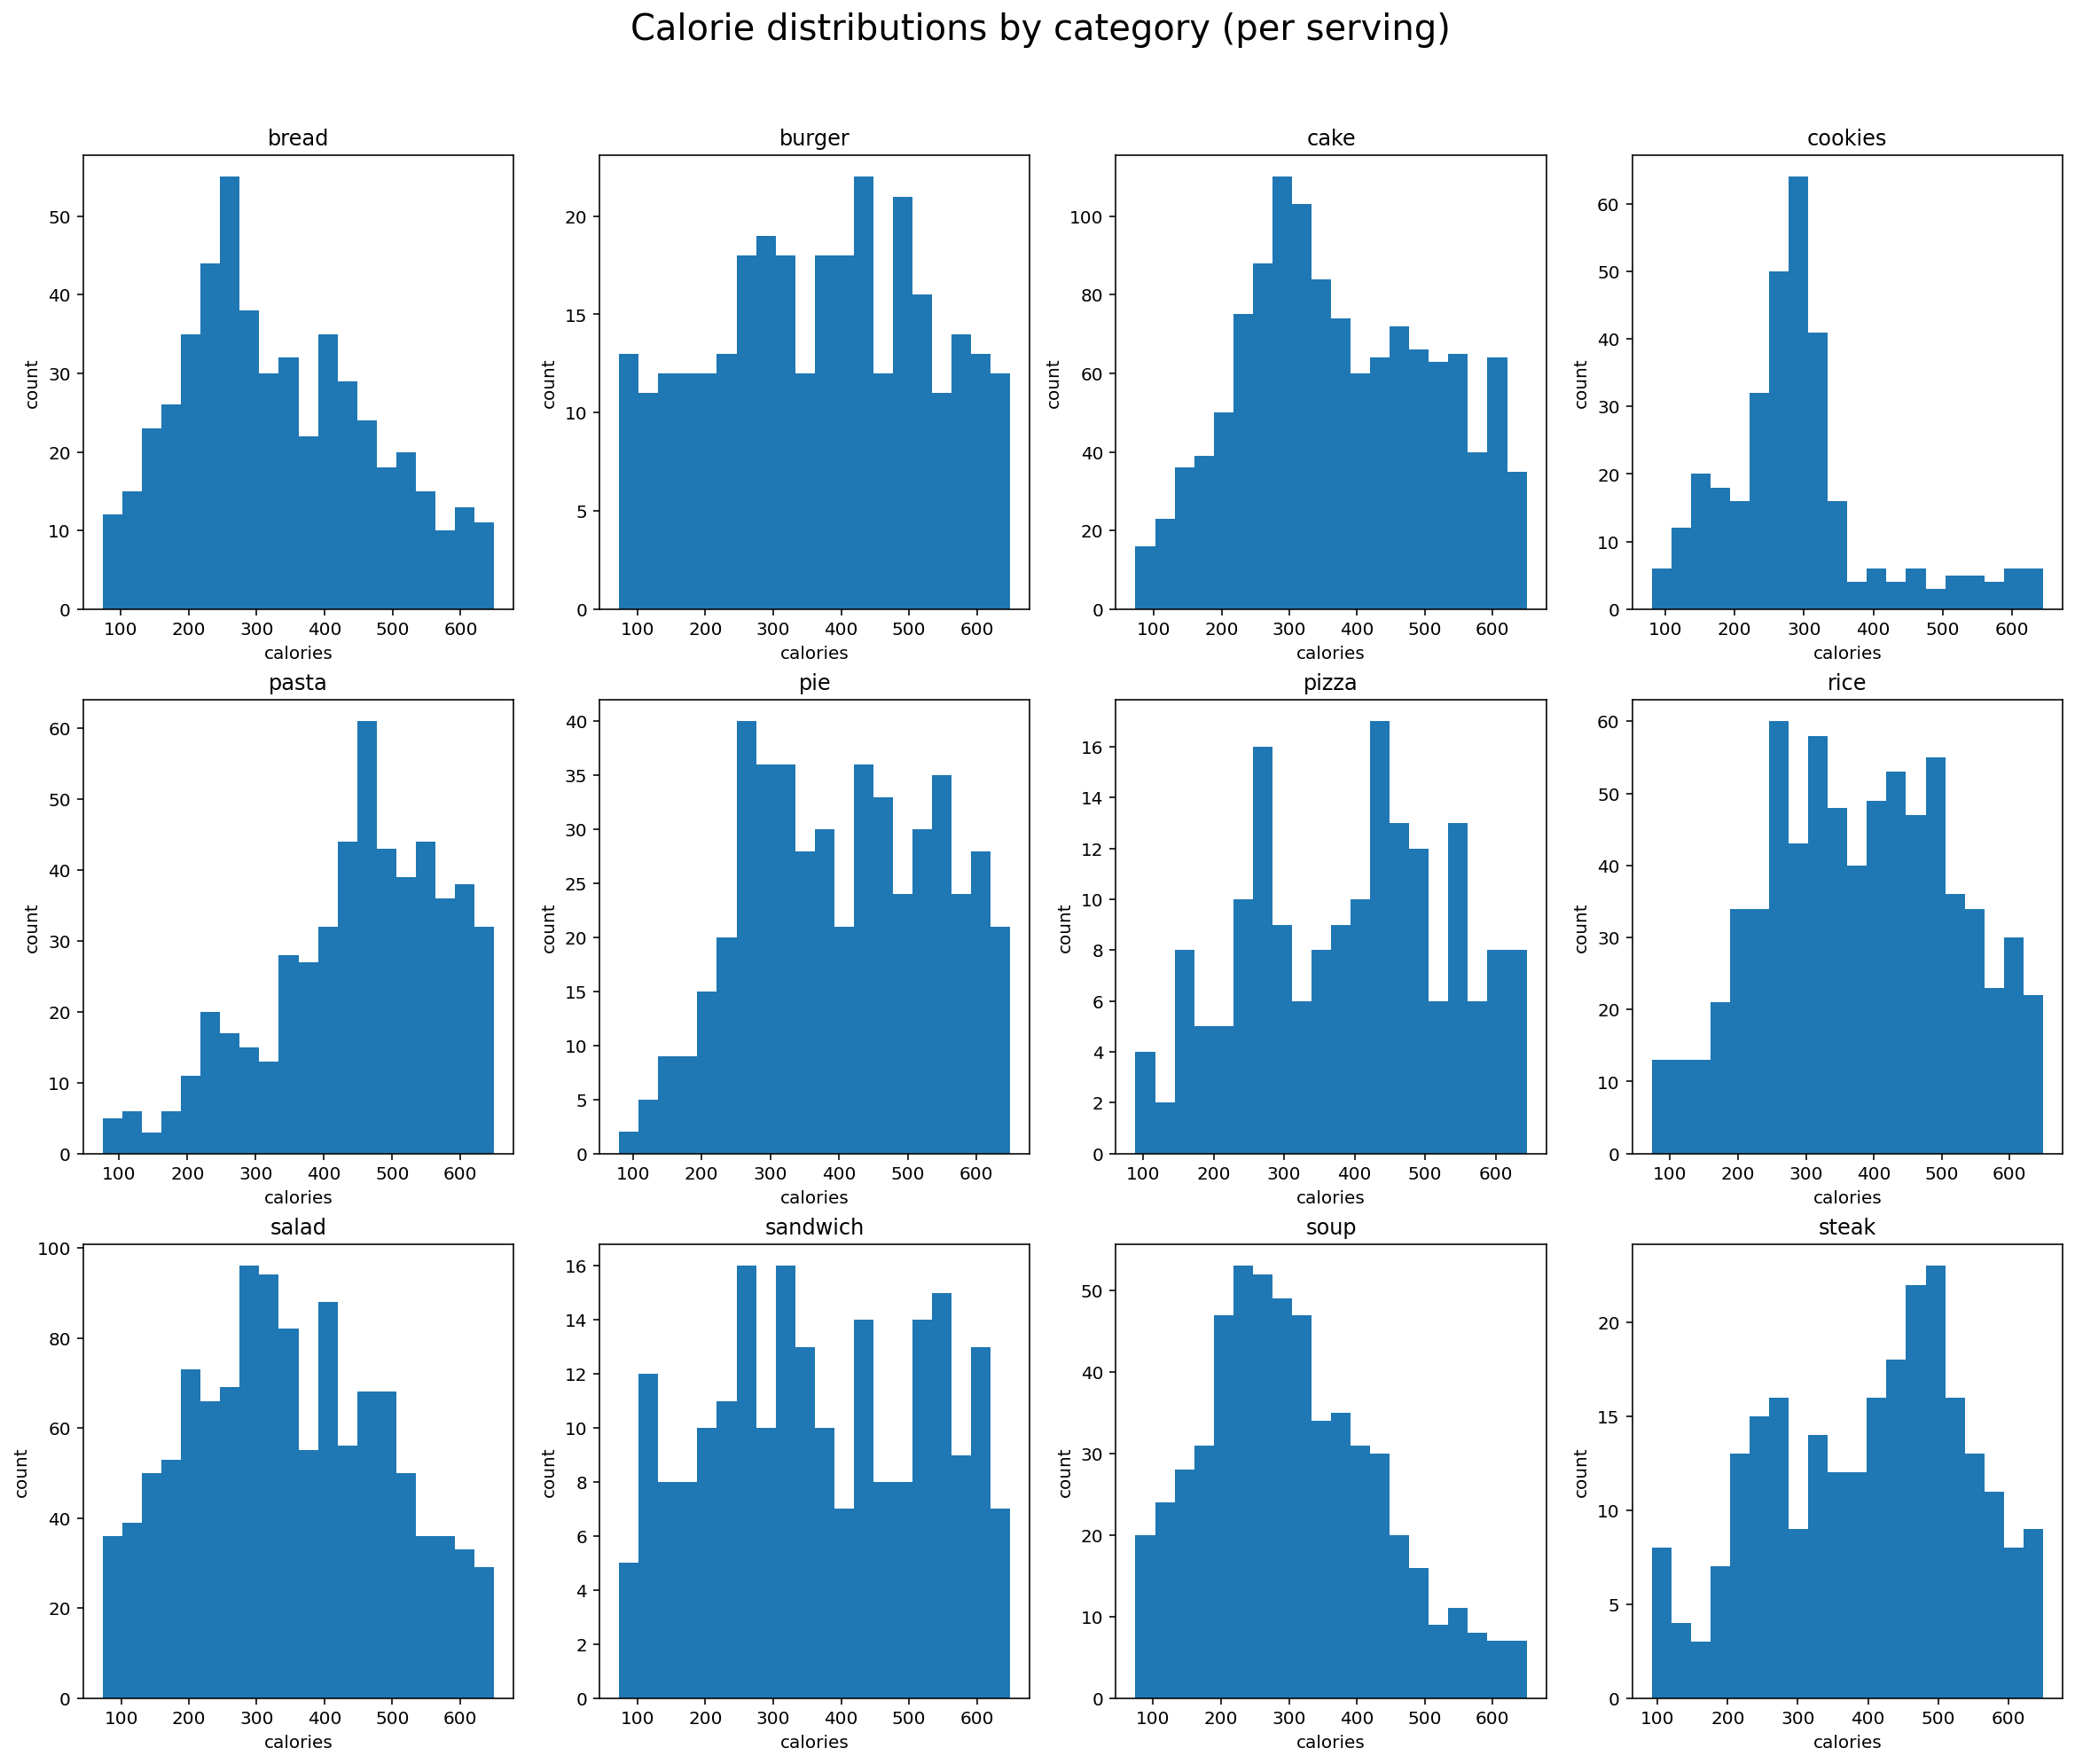

In [9]:
# plot the distributions of calories by category
# distributions of some categories are negtively skewed, such as cookies, soup, bread, salad. (low cals)
# those positively skewed include cake, pasta, pie, pizza, steak. (high cals)
# some of them are distributed somewhat evenly: burger, rice, sandwich (depending on what's inside).
# these distributions correspond to common senses, group2 uaually have oil as ingredient, which contains high cals.

categories = list(train['category'].unique())

plt.figure(figsize=(20,16))
plt.suptitle("Calorie distributions by category (per serving)", fontsize=20, y=0.95)
for i in range(1, len(categories)+1):
    plt.subplot(3,4,i)
    plt.hist(train[train['category']==categories[i-1]]['calorie'], bins=20)
    plt.title(categories[i-1])
    plt.ylabel('count')
    plt.xlabel('calories')

train.groupby('category')['calorie'].describe()

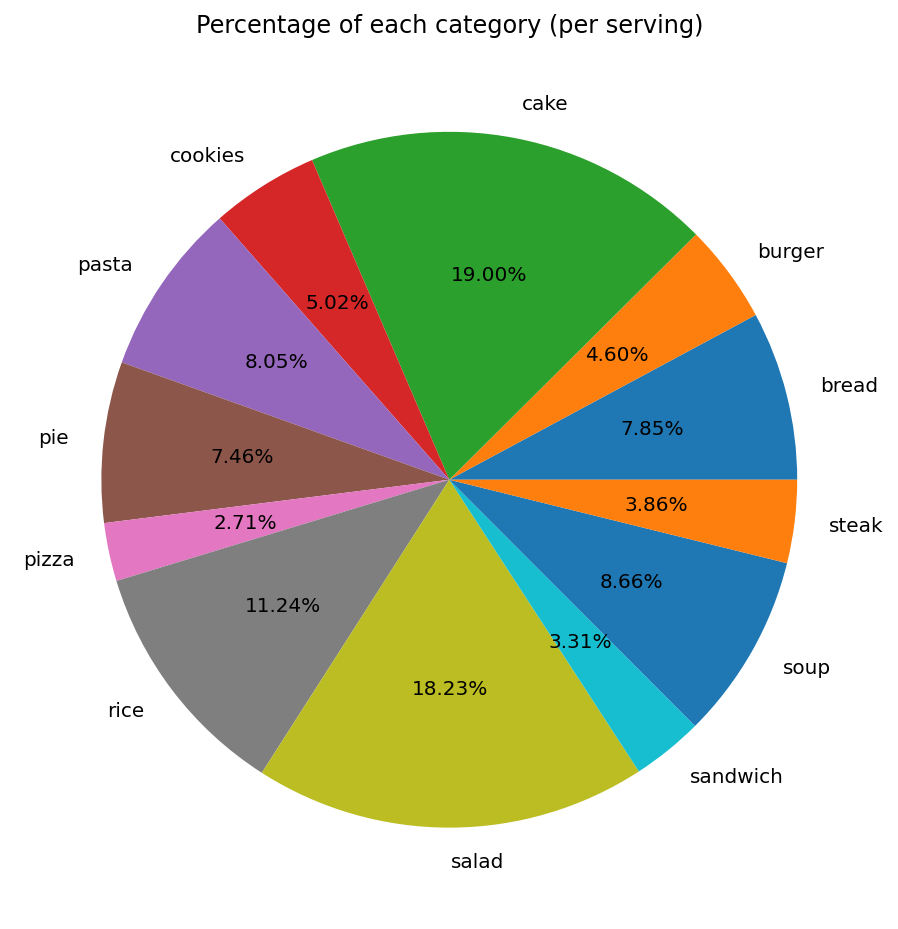

In [5]:
# cake and salad contribute to a large portion of samples
# since they are scraped from two food websites, it can be inferred that these two categories are more commonly found in daily lives.
# the aim of this project is to predict calories from images, so it's ok to collect images of different categories of different numbers.
# though more data should be collected to solve the class inbalance problem, and improve the acc of predicting category.

category_numbers = list(train.groupby('category')['calorie'].count())

plt.figure(figsize=(18,8))
plt.title("Percentage of each category (per serving)")
plt.pie(category_numbers, labels=categories, autopct='%1.2f%%')
plt.show()

In [10]:
# groupby category and source
# bbc:kitchen = 3988:2469 = 1.62:1
# the numbers of images in category are not equally scaled in two sources
# most of burger, salad, steak samples are from bbc, 
# even the mean values of the same category can vary in two sources: cake, pie, pizza, rice, salad, sandwich (more than 50cal)
# proving dishes can has high std and annotation is somehow subjective, 
# it's normal to have some errors even for experts as not every ingredients are weighted and cooking styles can influence too.

train.groupby(['category', 'source'])['calorie'].describe()

count  mean   std   min   25%   50%   75%   max
category source                                                  
bread    bbc      326.0 334.0 141.5  74.0 218.5 326.5 442.0 648.0
         kitchen  181.0 327.5 132.5  80.0 239.0 288.0 417.0 649.0
burger   bbc      275.0 366.7 159.3  73.0 246.5 371.0 498.5 649.0
         kitchen   22.0 377.0 124.0 223.0 254.5 374.5 468.8 644.0
cake     bbc      564.0 428.4 132.4  73.0 333.0 444.0 540.0 650.0
         kitchen  663.0 327.6 129.4  76.0 242.0 303.0 409.5 647.0
cookies  bbc      153.0 288.1 150.5  81.0 167.0 248.0 381.0 644.0
         kitchen  171.0 296.4  66.6 164.0 269.0 289.0 311.5 637.0
pasta    bbc      296.0 465.0 129.8  76.0 417.0 480.5 560.5 647.0
         kitchen  224.0 423.8 126.3 108.0 337.8 436.5 520.0 649.0
pie      bbc      289.0 447.6 127.2  80.0 359.0 457.0 545.0 649.0
         kitchen  193.0 344.6 123.2  96.0 265.0 315.0 441.0 643.0
pizza    bbc       97.0 428.0 126.9 112.0 352.0 439.0 525.0 630.0
         kitchen   78.0 346.6 145.5  89.0 236.2 295.5 458.5 644.0
rice     bbc      374.0 409.0 124.8  85.0 317.2 418.0 500.8 649.0
         kitchen  352.0 347.7 143.3  73.0 244.0 330.0 458.2 649.0
salad    bbc      947.0 356.5 144.0  73.0 253.5 352.0 469.5 646.0
         kitchen  230.0 308.8 132.1  77.0 203.8 292.0 395.2 650.0
sandwich bbc      123.0 401.2 157.1  73.0 275.5 437.0 532.0 643.0
         kitchen   91.0 325.1 150.6  93.0 213.5 303.0 424.0 649.0
soup     bbc      378.0 308.2 128.3  80.0 214.0 292.5 392.8 650.0
         kitchen  181.0 297.9 123.8  74.0 214.0 287.0 383.0 642.0
steak    bbc      166.0 410.2 132.8  92.0 323.5 448.0 504.5 649.0
         kitchen   83.0 375.1 148.4 103.0 251.0 346.0 484.5 646.0

### nutrient distributions
fat, carbohydrate, protein

they are included only to improve the accuracy of predicting calories, we can ignore its accuracy.

In [23]:
# there's one outlier in the carbs that reaches 2012g, but it's ok as long as calorie value is reasonable
# most of the values of fat and protein are less than 25g, carbs less than 50g
# this is reasonable considering the values of them in daily intake are not high either

fats, carbs, proteins = [], [], []
for i in train['nutrient_vector']:
    fats.append(i[0])
    carbs.append(i[1])
    proteins.append(i[2])
    
nutrient_names = ['fat', 'carb', 'protein']
nutrient_df = pd.DataFrame()
nutrient_df['fat'] = fats
nutrient_df['carb'] = carbs
nutrient_df['protein'] = proteins
nutrient_df.describe()

,fat,carb,protein
count,6457.0,6457.0,6457.0
mean,17.6,36.5,15.5
std,10.1,33.1,12.1
min,0.0,0.1,0.0
25%,10.0,20.0,5.5
50%,16.0,34.5,12.0
75%,24.0,50.0,23.0
max,84.0,2012.0,94.7


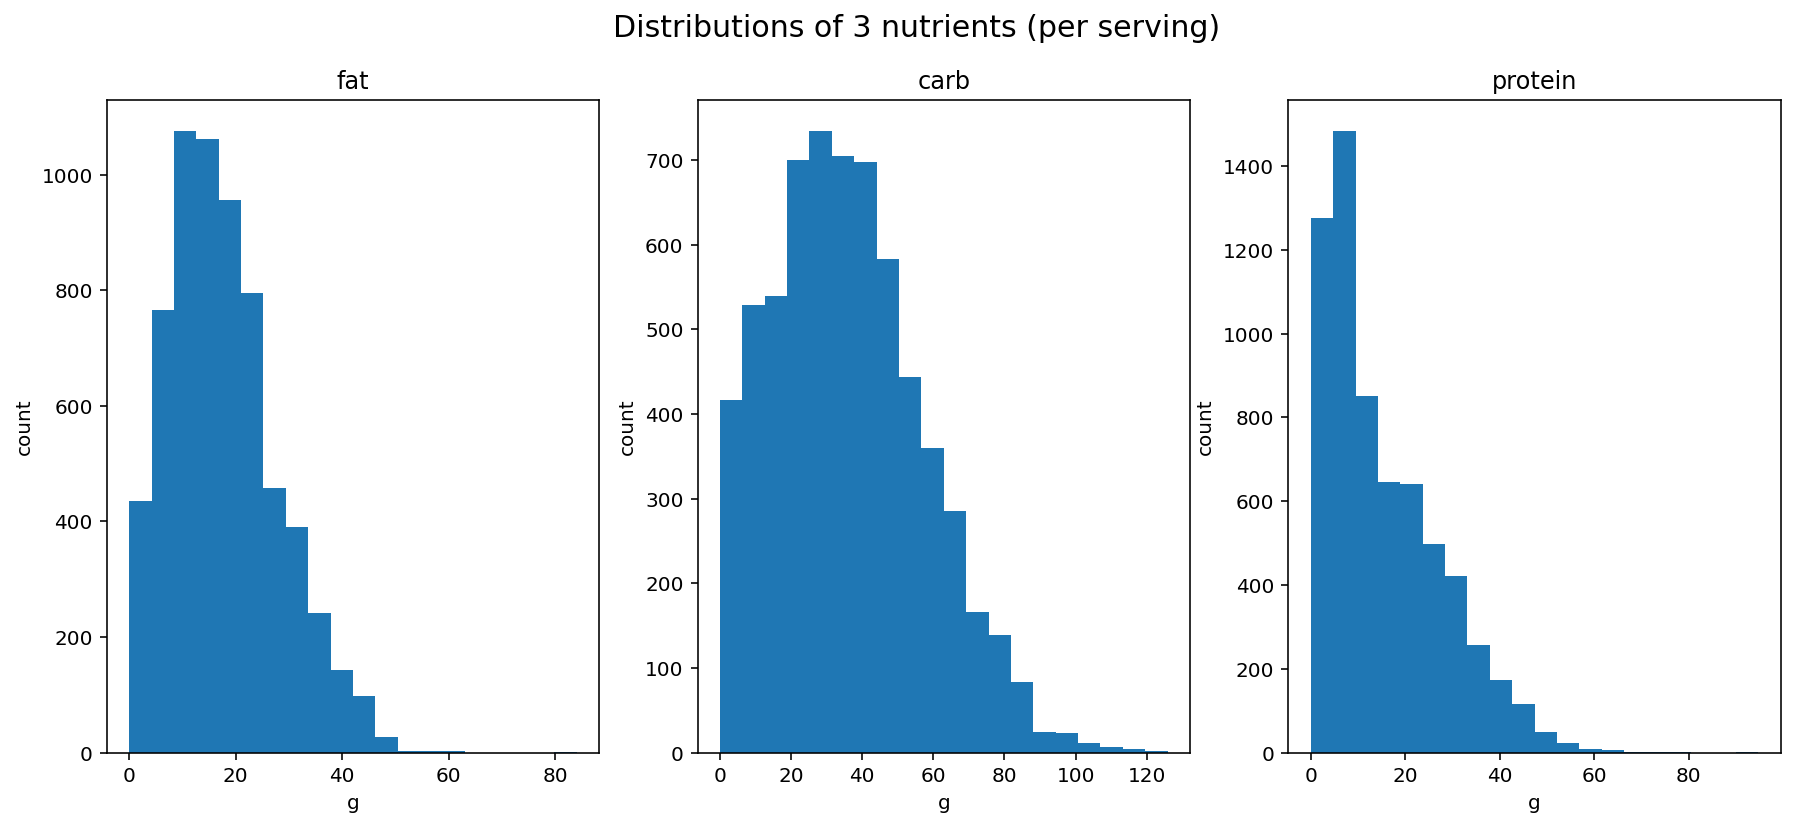

In [24]:
# the distributions of them are all negatively skewed, centers around a relatively small value
# it can be inferred that nutrients of different categories don't vary much, but rather steady per serving

# two values are greater than 200g (570/2012), remove them for better plot
nutrient_df['carb'] = nutrient_df['carb'][nutrient_df['carb']<200]

plt.figure(figsize=(15,6))
plt.suptitle("Distributions of 3 nutrients (per serving)", fontsize=15, y=0.98)
for i in range(1, len(nutrient_names)+1):
    plt.subplot(1,3,i)
    plt.hist(nutrient_df[nutrient_names[i-1]], bins=20)
    plt.title(nutrient_names[i-1])
    plt.ylabel('count')
    plt.xlabel('g')

## Per recipe

In [12]:
train = pd.read_csv('./data/per_recipe/train_per_recipe_complete.csv')
train['nutrient_vector'] = train['nutrient_vector'].apply(ast.literal_eval)
print(len(train))

5422


### calorie distributions
by source and by category

,serving,calorie,calorie_per_recipe
count,5422.000000,5422.000000,5422.000000
mean,4.372003,376.177425,1452.688491
std,2.668234,188.135709,727.833070
min,1.000000,10.000000,13.000000
25%,2.000000,245.000000,880.000000
50%,4.000000,350.000000,1404.000000
75%,6.000000,485.750000,2028.000000
max,30.000000,2519.000000,2912.000000


<Figure size 720x360 with 0 Axes>

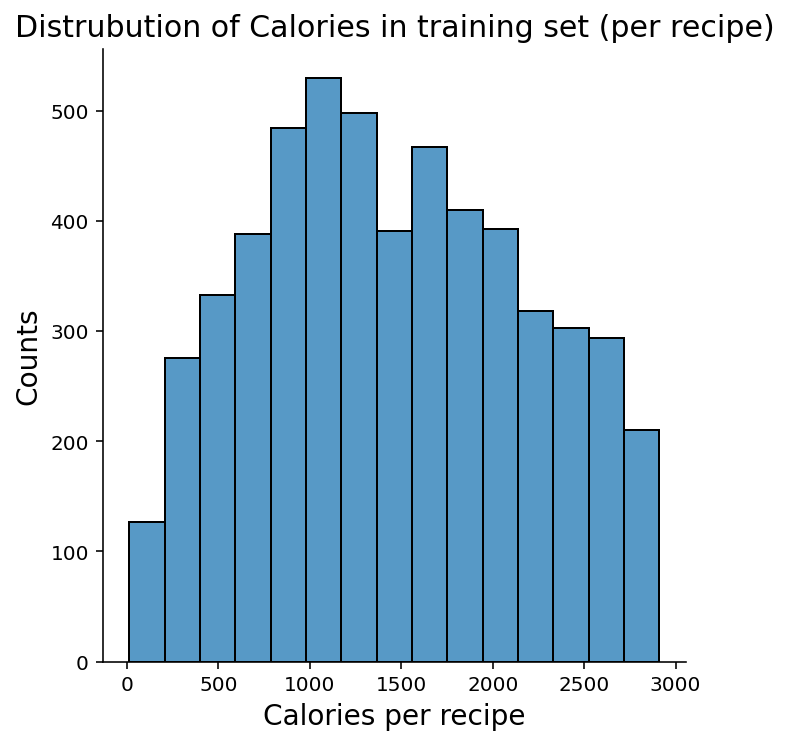

In [10]:
# distribution of calorie_per_recipe in training set
# distributed somewhat more even and more spread than per serving
# most of calorie values are in the range of (500, 2500) (79.6%)
# more than half of all the values fall in the range of (800, 2200) (60.1%) 

plt.figure(figsize=(10,5))
sns.displot(train['calorie_per_recipe'], bins = 15)
#plt.bar(appliances, height=10)

plt.xlabel('Calories per recipe', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Distrubution of Calories in training set (per recipe)', fontsize = 15)
#plt.grid()

train.describe()

In [9]:
def print_percentage_of_extreme_values(train, high, low):
    high_vals = train['calorie_per_recipe'][train['calorie_per_recipe']>high].count()
    low_vals = train['calorie_per_recipe'][train['calorie_per_recipe']<low].count()
    print("Training sample with calorie higher than " + str(high) + "cal: ", high_vals)
    print("Training sample with calorie lower than " + str(low) + "cal: ", low_vals)
    print("The percentage of samples with high and low calories is ", round((high_vals+low_vals)/len(train), 3) * 100, "%")
    
    
print_percentage_of_extreme_values(train, 2200, 800)

Training sample with calorie higher than 2200cal:  1011
Training sample with calorie lower than 800cal:  1152
The percentage of samples with high and low calories is  39.900000000000006 %


,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
bbc,3335.0,1452.273763,683.633707,18.0,920.0,1360.0,1976.0,2912.0
kitchen,2087.0,1453.351222,793.538936,13.0,777.0,1484.0,2100.0,2908.0


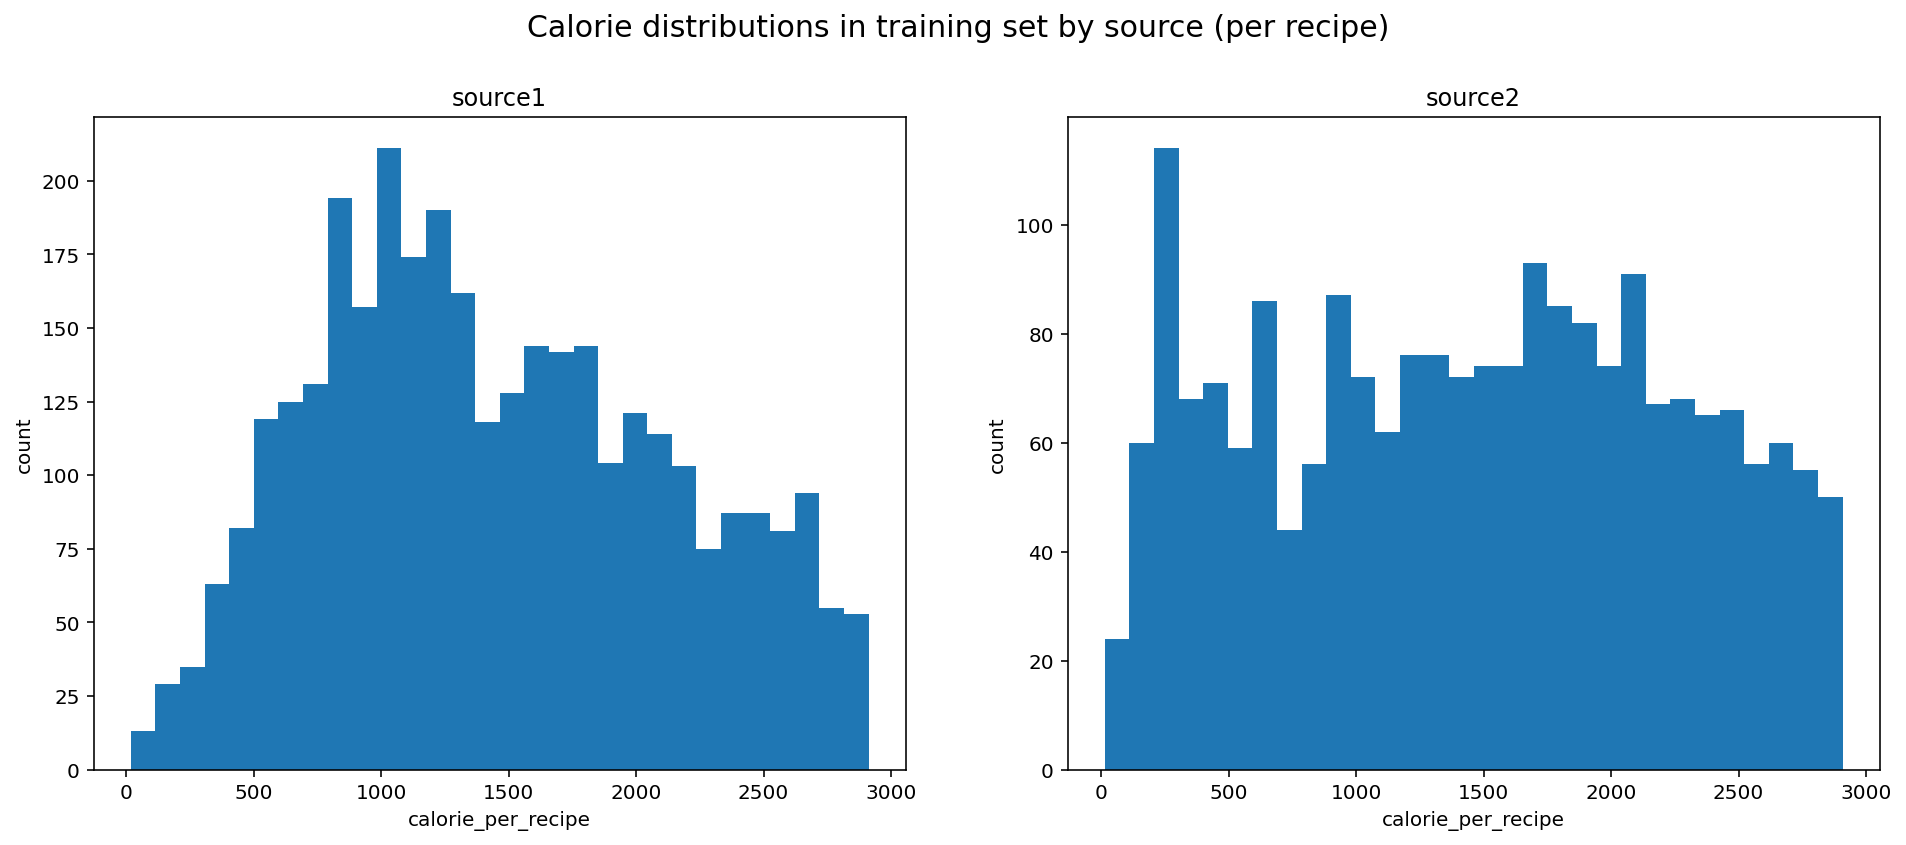

In [8]:
# plot the distributions of calorie_per_recipe by source
# unlike per serving, samples from two sources have similar mean values per recipe, where bbc has lower std. 
# this may imply that annotated servings from kitchen are larger given that the mean values are much smaller per serving
# also, similar mean values from different sources indicate that this may be common calorie distributions for recipes.

plt.figure(figsize=(16,6))
plt.suptitle("Calorie distributions in training set by source (per recipe)", fontsize=15, y=1)
plt.subplot(1,2,1)
plt.hist(train[train['source']=='bbc']['calorie_per_recipe'], bins=30)
plt.title('source1')
plt.ylabel('count')
plt.xlabel('calorie_per_recipe')
plt.subplot(1,2,2)
plt.title('source2')
plt.ylabel('count')
plt.xlabel('calorie_per_recipe')
plt.hist(train[train['source']=='kitchen']['calorie_per_recipe'], bins=30)

train.groupby('source')['calorie_per_recipe'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
bread,436.0,1409.5,777.7,74.0,776.0,1392.0,2036.0,2908.0
burger,287.0,1531.6,684.4,88.0,1012.0,1492.0,2038.0,2908.0
cake,633.0,1399.0,826.7,13.0,664.0,1404.0,2096.0,2900.0
cookies,114.0,1493.5,813.7,84.0,825.0,1303.0,2256.8,2892.0
pasta,516.0,1815.1,648.6,51.0,1382.0,1882.0,2326.0,2910.0
pie,306.0,1707.1,784.9,46.0,1125.5,1770.0,2389.5,2904.0
pizza,175.0,1500.5,719.3,132.0,976.0,1520.0,2042.0,2912.0
rice,713.0,1534.7,685.9,56.0,1004.0,1502.0,2052.0,2904.0
salad,1210.0,1302.6,653.2,20.0,793.0,1208.0,1758.0,2910.0


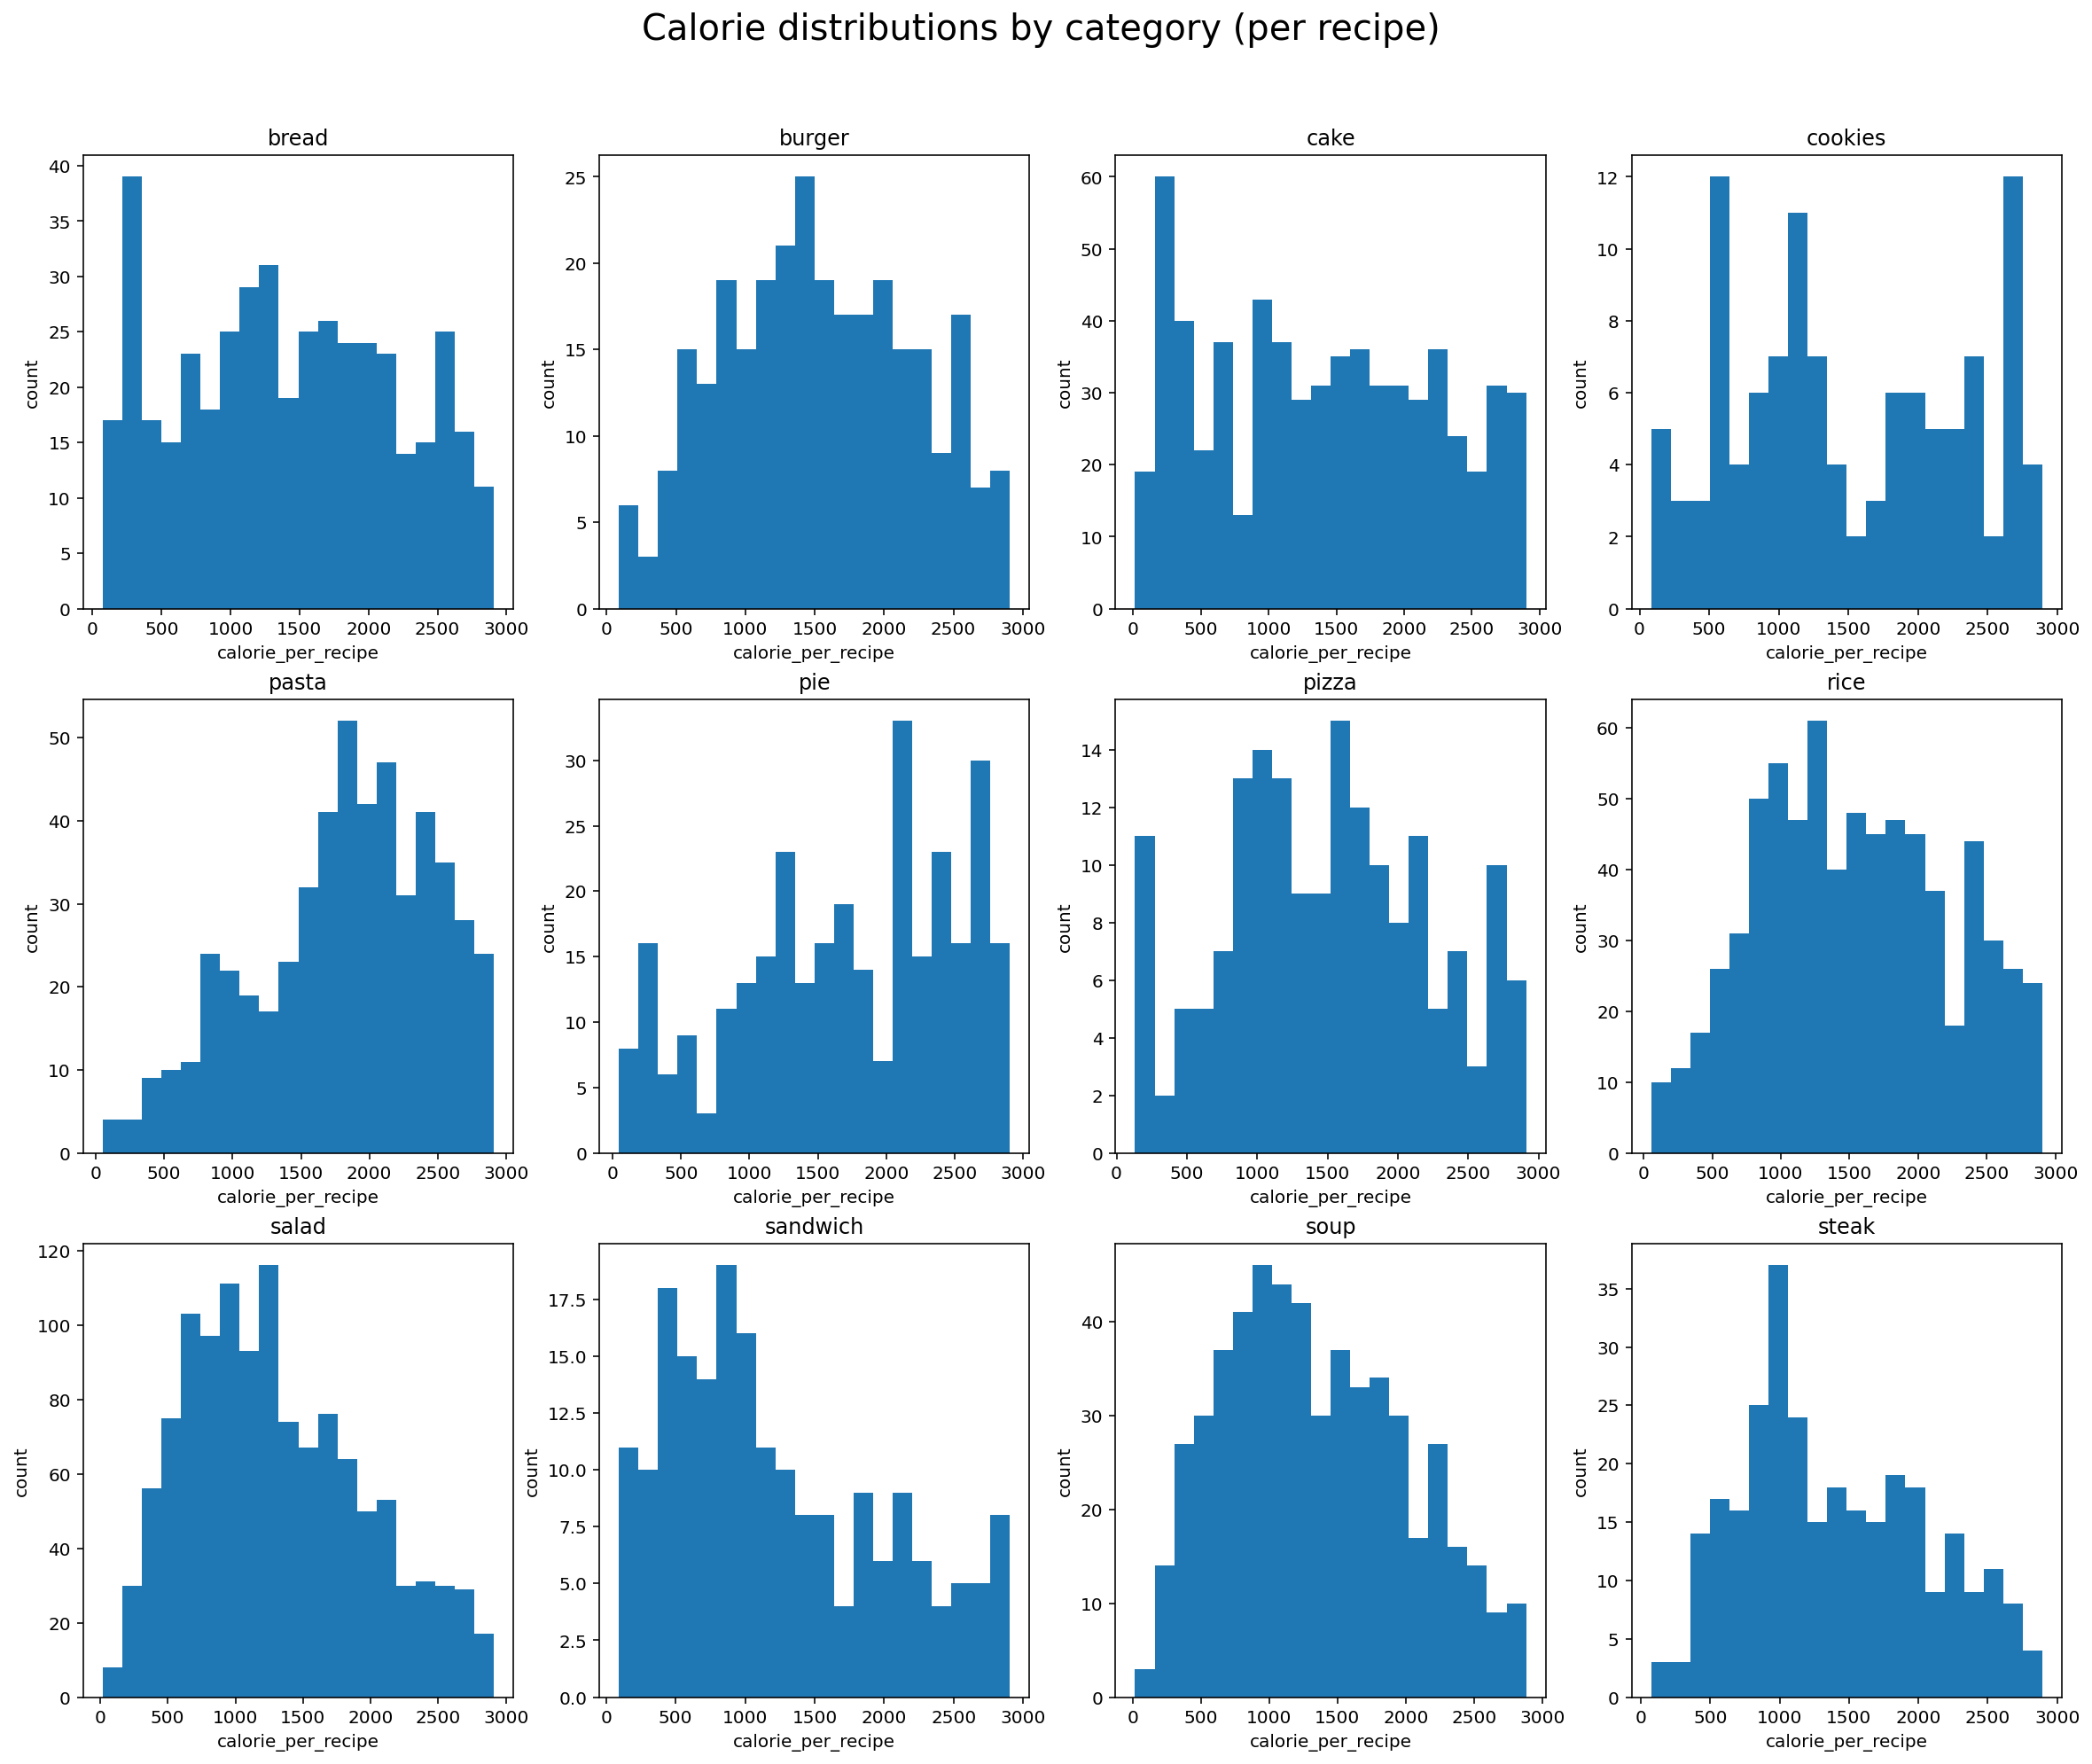

In [13]:
# plot the distributions of calories by category
# cookie is weirdly distributed to either high or low values, depending on the serving sizes
# distributions of some categories are negtively skewed, such as sandwich, soup, salad. (low cals)
# those positively skewed include rice, pasta, pie, pizza. (high cals)
# some of them are distributed somewhat evenly: burger, cake, bread (depending on what's inside).
# these distributions correspond to common senses, where group2 uaually have 'oil' as ingredient, which contains high cals.
# group1 have more vegetable and is more green and healthy.
# group3 highly depend on the ingredient and types

categories = list(train['category'].unique())

plt.figure(figsize=(20,16))
plt.suptitle("Calorie distributions by category (per recipe)", fontsize=20, y=0.95)
for i in range(1, len(categories)+1):
    plt.subplot(3,4,i)
    plt.hist(train[train['category']==categories[i-1]]['calorie_per_recipe'], bins=20)
    plt.title(categories[i-1])
    plt.ylabel('count')
    plt.xlabel('calorie_per_recipe')

train.groupby('category')['calorie_per_recipe'].describe()

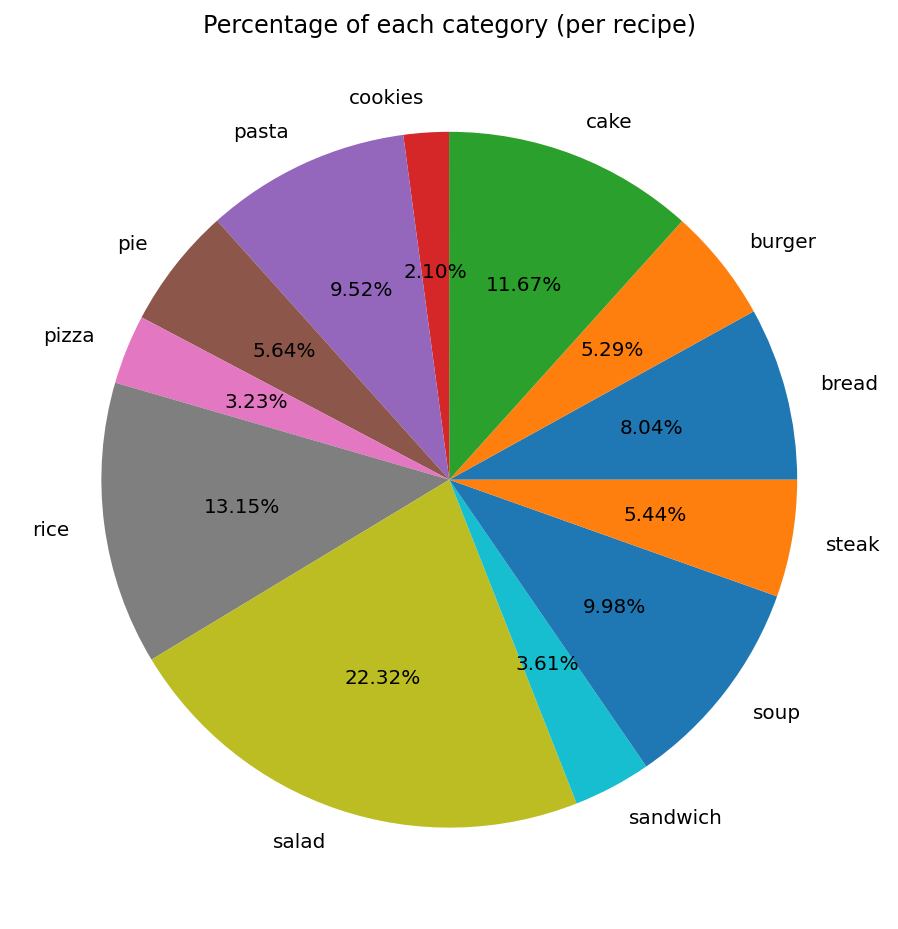

In [10]:
# cake, salad, rice contribute to a large portion of samples
# since they are scraped from two food websites, it can be inferred that these categories are more commonly found in daily lives.
# the aim of this project is to predict calories from images, so it's ok to collect images of different categories of different numbers.
# though more data should be collected to solve the class inbalance problem, and improve the acc of predicting category.

category_numbers = list(train.groupby('category')['calorie_per_recipe'].count())

plt.figure(figsize=(18,8))
plt.title("Percentage of each category (per recipe)")
plt.pie(category_numbers, labels=categories, autopct='%1.2f%%')
plt.show()

In [12]:
# groupby category and source
# bbc:kitchen = 3335:2087 = 1.60:1
# the numbers of images in category are not equally scaled in two sources
# most of burger, salad samples are from bbc, 
# interestingly, most of cake samples are from kitchen, which means a large portion of cake, , collected from bbc is removed. 
# this may indicate that annotations from bbc are not so reliable, simply multiplying servings leads to many outliers.
# even the mean values of the same category can vary in two sources: except pizza, rice, sandwich (more than 50cal)
# proving dishes can has high std and annotation is somehow subjective, 
# so it's normal to have some errors even for experts as not every ingredients are weighted and cooking styles can influence too.

train.groupby(['category', 'source'])['calorie_per_recipe'].describe()

count         mean         std    min      25%     50%  \
category source                                                            
bread    bbc      284.0  1483.975352  715.777135   74.0   967.00  1451.0   
         kitchen  152.0  1270.223684  867.300174   80.0   323.00  1241.0   
burger   bbc      264.0  1508.655303  681.737011   88.0  1006.50  1460.0   
         kitchen   23.0  1795.478261  674.482217  464.0  1298.00  1784.0   
cake     bbc      141.0  1657.446809  700.384470  319.0  1117.00  1557.0   
         kitchen  492.0  1324.983740  845.717945   13.0   495.00  1306.0   
cookies  bbc       58.0  1762.137931  781.886393   84.0  1169.25  1864.0   
         kitchen   56.0  1215.357143  756.292330  223.0   588.00  1059.5   
pasta    bbc      308.0  1755.538961  668.137180   51.0  1215.50  1808.0   
         kitchen  208.0  1903.187500  609.484583  187.0  1621.00  2002.0   
pie      bbc      167.0  1847.155689  654.169730  175.0  1273.00  1828.0   
         kitchen  139.0  1538.726619  891.327164   46.0   588.50  1590.0   
pizza    bbc      104.0  1499.288462  630.359578  224.0   996.00  1402.0   
         kitchen   71.0  1502.323944  837.514619  132.0   821.00  1652.0   
rice     bbc      374.0  1550.783422  635.989557  198.0  1037.00  1510.0   
         kitchen  339.0  1516.861357  737.617447   56.0   943.00  1500.0   
salad    bbc      972.0  1284.871399  640.527305  108.0   792.00  1185.0   
         kitchen  238.0  1375.008403  699.202554   20.0   796.00  1355.0   
sandwich bbc      111.0  1233.819820  745.690250  105.0   646.00  1022.0   
         kitchen   85.0  1223.505882  801.345530   93.0   555.00  1100.0   
soup     bbc      367.0  1279.438692  633.706820   18.0   805.00  1182.0   
         kitchen  174.0  1458.936782  703.891817  163.0   895.50  1473.0   
steak    bbc      185.0  1336.172973  590.501696  376.0   906.00  1188.0   
         kitchen  110.0  1482.636364  757.338334   75.0   877.00  1466.0   

                     75%     max  
category source                   
bread    bbc      2050.5  2908.0  
         kitchen  2002.0  2876.0  
burger   bbc      2026.0  2908.0  
         kitchen  2266.0  2840.0  
cake     bbc      2240.0  2900.0  
         kitchen  2028.0  2888.0  
cookies  bbc      2457.5  2860.0  
         kitchen  1770.0  2892.0  
pasta    bbc      2293.0  2910.0  
         kitchen  2346.5  2886.0  
pie      bbc      2435.0  2904.0  
         kitchen  2326.0  2892.0  
pizza    bbc      1911.0  2912.0  
         kitchen  2157.0  2796.0  
rice     bbc      2027.0  2898.0  
         kitchen  2094.0  2904.0  
salad    bbc      1705.0  2910.0  
         kitchen  1883.0  2908.0  
sandwich bbc      1841.0  2904.0  
         kitchen  1805.0  2904.0  
soup     bbc      1740.0  2820.0  
         kitchen  1997.5  2880.0  
steak    bbc      1776.0  2892.0  
         kitchen  2088.0  2844.0

### nutrient distributions
fat, carbohydrate, protein

they are included only to improve the accuracy of predicting calories, we can ignore its accuracy.

In [14]:
# there's one outlier in the carbs that reaches 2012g, but it's ok as long as calorie value is reasonable
# most of the values of fat and protein are less than 100g, carbs less than 300g per recipe
# this is reasonable considering the values of them in daily intake are not high either

fats, carbs, proteins = [], [], []
for i in train['nutrient_vector']:
    fats.append(i[0])
    carbs.append(i[1])
    proteins.append(i[2])
    
nutrient_names = ['fat', 'carb', 'protein']
nutrient_df = pd.DataFrame()
nutrient_df['fat'] = fats
nutrient_df['carb'] = carbs
nutrient_df['protein'] = proteins
nutrient_df.describe()

,fat,carb,protein
count,5422.000000,5422.000000,5422.000000
mean,68.512191,141.741037,67.895979
std,45.836759,150.451149,50.607407
min,0.000000,0.400000,0.000000
25%,32.000000,55.700000,29.250000
50%,60.000000,116.000000,58.000000
75%,96.000000,208.000000,96.000000
max,336.000000,8048.000000,432.000000


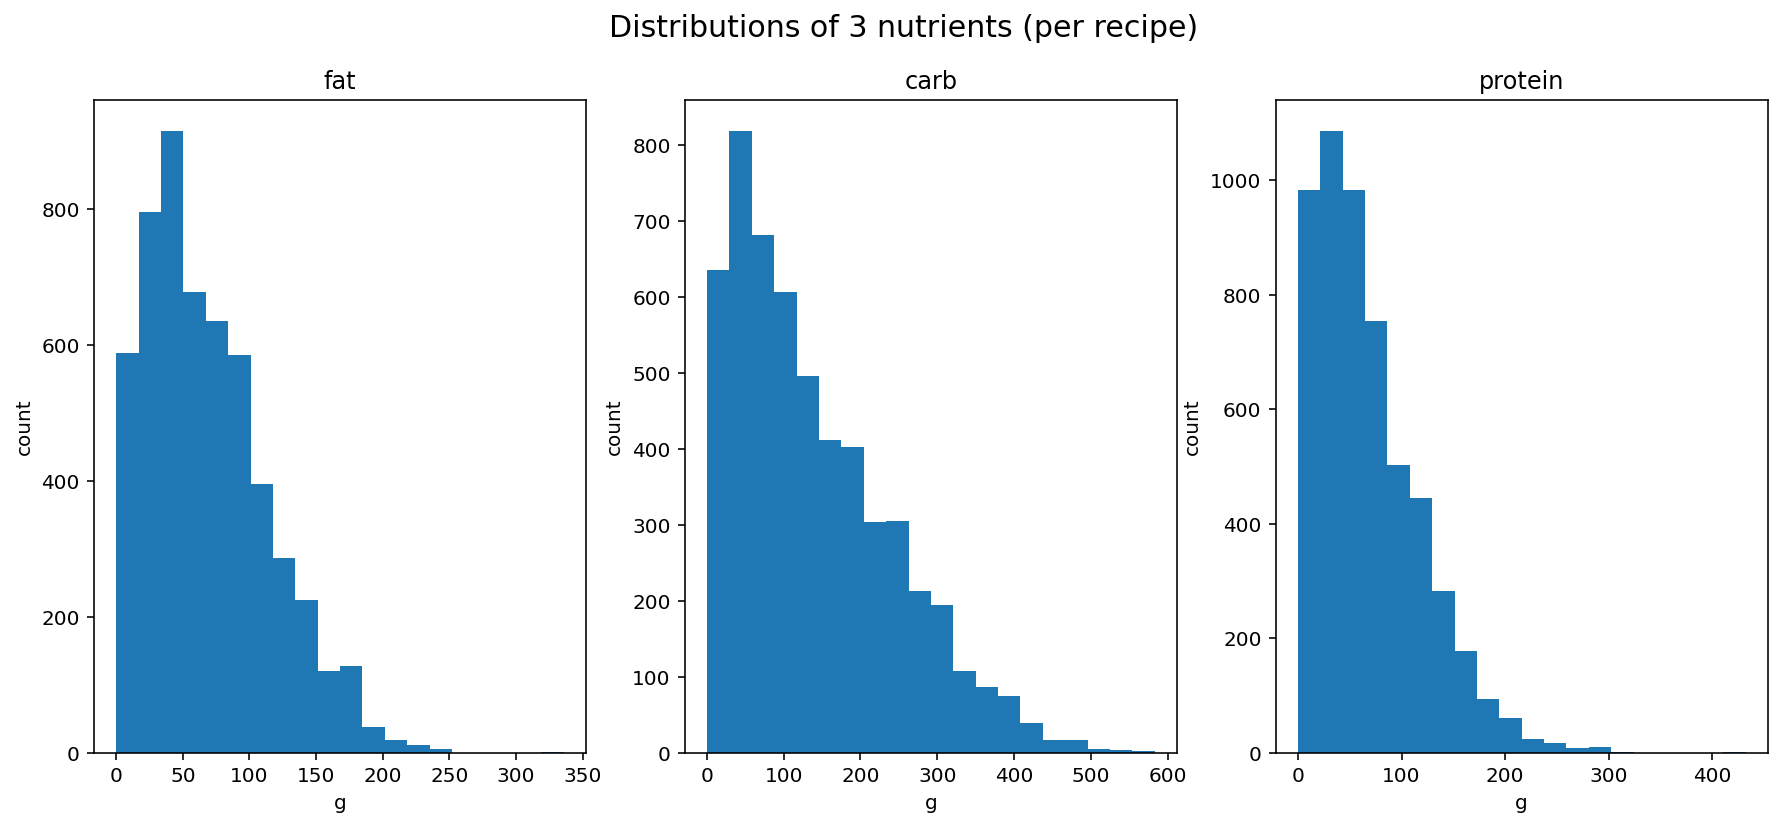

In [21]:
# the distributions of them are all negatively skewed, centers around a relatively small value
# it can be inferred that nutrients of different categories don't vary much, but rather steady per serving

# two values are greater than 600g (610, 613, 607, 652, 8048), remove them for better plot
nutrient_df['carb'] = nutrient_df['carb'][nutrient_df['carb']<600]

plt.figure(figsize=(15,6))
plt.suptitle("Distributions of 3 nutrients (per recipe)", fontsize=15, y=0.98)
for i in range(1, len(nutrient_names)+1):
    plt.subplot(1,3,i)
    plt.hist(nutrient_df[nutrient_names[i-1]], bins=20)
    plt.title(nutrient_names[i-1])
    plt.ylabel('count')
    plt.xlabel('g')